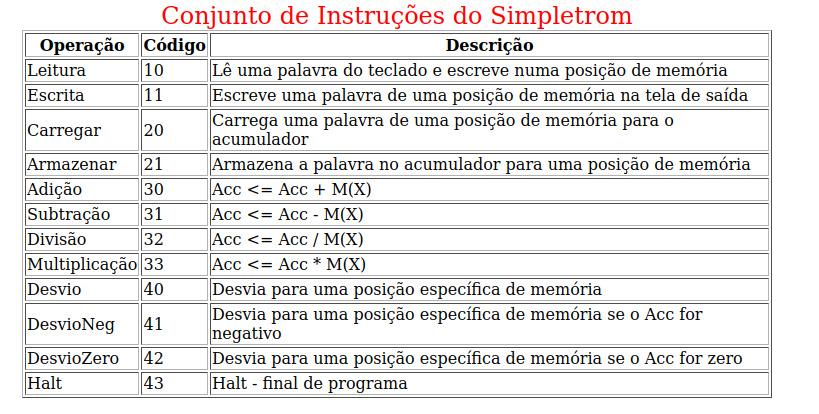

In [1]:
from IPython.display import Image
Image(filename='simpletron.png')

In [24]:
# Definir constantes
READ = 10
WRITE = 11
LOAD = 20
STORE = 21
ADD = 30
SUBTRACT = 31
DIVIDE = 32
MULTIPLY = 33
BRANCH = 40
BRANCHNEG = 41
BRANCHZERO = 42
HALT = 43

# Inicializar o Simpletron
memory = [0] * 100
accumulator = 0
instruction_counter = 0
instruction_register = 0
operation_code = 0
operand = 0

# Função para exibir o estado atual do Simpletron
def display_state():
    print("REGISTERS:")
    print(f"accumulator:\t\t{accumulator:+04d}")
    print(f"instruction_counter:\t{instruction_counter:02d}")
    print(f"instruction_register:\t{instruction_register:04d}")
    print(f"operation_code:\t\t{operation_code:02d}")
    print(f"operand:\t\t{operand:02d}")
    print()
    print("MEMORY:")
    for i in range(0, len(memory), 10):
        print(f"{i:02d}:", end=" ")
        for j in range(i, i+10):
            print(f"{memory[j]:+04d}", end=" ")
        print()
    print()

# Carregar programa na memória
program = [
    1007,  # READ 07
    2107,  # STORE 07
    1008,  # READ 08
    3107,  # ADD 07
    2108,  # STORE 08
    1107,  # WRITE 07
    4300   # HALT
]

for address, instruction in enumerate(program):
    memory[address] = instruction

# Executar o programa
while True:
    # Buscar a instrução
    instruction_register = memory[instruction_counter]
    operation_code = instruction_register // 100
    operand = instruction_register % 100

    # Atualizar o contador de instruções
    instruction_counter += 1

    # Executar a instrução
    if operation_code == READ:
        value = int(input("Enter a value: "))
        memory[operand] = value
    elif operation_code == WRITE:
        print(f"Value: {memory[operand]}")
    elif operation_code == LOAD:
        accumulator = memory[operand]
    elif operation_code == STORE:
        memory[operand] = accumulator
    elif operation_code == ADD:
        accumulator += memory[operand]
    elif operation_code == SUBTRACT:
        accumulator -= memory[operand]
    elif operation_code == DIVIDE:
        accumulator //= memory[operand]
    elif operation_code == MULTIPLY:
        accumulator *= memory[operand]
    elif operation_code == BRANCH:
        instruction_counter = operand
    elif operation_code == BRANCHNEG:
        if accumulator < 0:
            instruction_counter = operand
    elif operation_code == BRANCHZERO:
        if accumulator == 0:
            instruction_counter = operand
    elif operation_code == HALT:
        print("Program execution halted.")
        break

    display_state()


Enter a value: 121431
REGISTERS:
accumulator:		+000
instruction_counter:	01
instruction_register:	1007
operation_code:		10
operand:		07

MEMORY:
00: +1007 +2107 +1008 +3107 +2108 +1107 +4300 +121431 +000 +000 
10: +000 +000 +000 +000 +000 +000 +000 +000 +000 +000 
20: +000 +000 +000 +000 +000 +000 +000 +000 +000 +000 
30: +000 +000 +000 +000 +000 +000 +000 +000 +000 +000 
40: +000 +000 +000 +000 +000 +000 +000 +000 +000 +000 
50: +000 +000 +000 +000 +000 +000 +000 +000 +000 +000 
60: +000 +000 +000 +000 +000 +000 +000 +000 +000 +000 
70: +000 +000 +000 +000 +000 +000 +000 +000 +000 +000 
80: +000 +000 +000 +000 +000 +000 +000 +000 +000 +000 
90: +000 +000 +000 +000 +000 +000 +000 +000 +000 +000 

REGISTERS:
accumulator:		+000
instruction_counter:	02
instruction_register:	2107
operation_code:		21
operand:		07

MEMORY:
00: +1007 +2107 +1008 +3107 +2108 +1107 +4300 +000 +000 +000 
10: +000 +000 +000 +000 +000 +000 +000 +000 +000 +000 
20: +000 +000 +000 +000 +000 +000 +000 +000 +000 +000 